## Basic clustering 

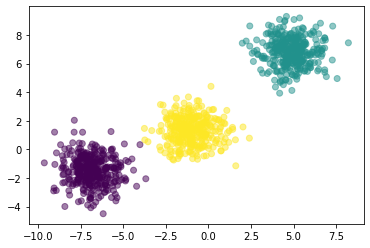

In [4]:
import sklearn.datasets
data, labels = sklearn.datasets.make_blobs(n_samples=1000)
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.5)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

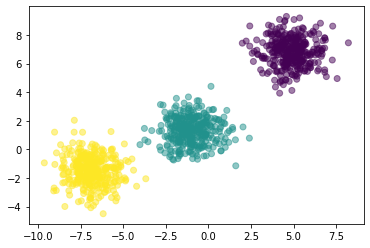

In [9]:
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, alpha=0.5)

In [37]:
labels[:10]

array([1, 0, 2, 1, 0, 0, 0, 1, 0, 0])

In [13]:
kmeans.labels_[:10]

array([0, 2, 1, 0, 2, 2, 2, 0, 2, 2], dtype=int32)

In [85]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score

In [18]:
homogeneity_score(labels, kmeans.labels_)

0.9938015906454756

* homogeneity : all clusters only have points which are members of a single class
* completeness : all data points from a given class are elements of the same cluster
* v-measure : meaning? 
* confusion matrix
* contingency matrix

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = confusion_matrix(labels, kmeans.labels_)
matrix

array([[  0,   1, 333],
       [333,   0,   0],
       [  0, 333,   0]])

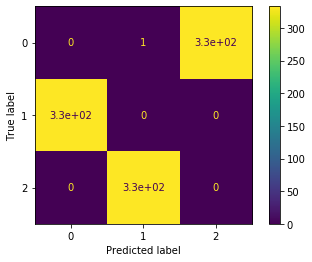

In [39]:
disp = ConfusionMatrixDisplay(matrix, display_labels=[0,1,2])
disp.plot()

In [36]:
matrix

array([[  0,   1, 333],
       [333,   0,   0],
       [  0, 333,   0]])

In [64]:
matrix.argmax(axis=1)

array([2, 0, 1])

## MNIST

In [68]:
from sklearn.datasets import fetch_openml

raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [69]:
nsamples = 5000
data = raw_data[:nsamples] / 255.
labels = raw_labels[:nsamples].astype('int')

In [92]:
view = TSNE(n_components=2).fit_transform(data)

0.7203201008220923
0.7226392493161917


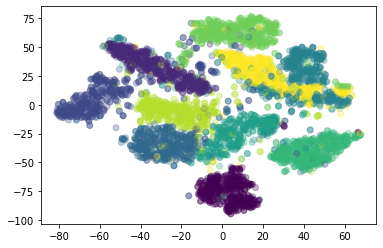

In [93]:
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.3)

### agglomerative

0.7747359362451218
0.7778840625323201


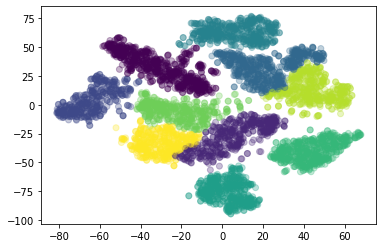

In [128]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=10).fit(view)
plt.scatter(view[:,0], view[:,1], c=clusters.labels_, alpha=0.3)
print(homogeneity_score(labels, clusters.labels_))
print(completeness_score(labels, clusters.labels_))

### kmeans

0.7203201008220923
0.7226392493161917


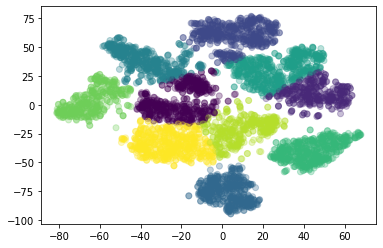

In [130]:
clusters = KMeans(n_clusters=10, random_state=0).fit(view)
plt.scatter(view[:,0], view[:,1], c=clusters.labels_, alpha=0.3)
print(homogeneity_score(labels, clusters.labels_))
print(completeness_score(labels, clusters.labels_))

### t-sne to 3d, clustering, and 2d display

In [120]:
view3 = TSNE(n_components=3).fit_transform(data)

0.7511729006301014
0.7710269742239577


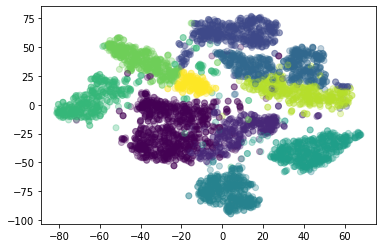

In [131]:
clusters = AgglomerativeClustering(n_clusters=10).fit(view3)
plt.scatter(view[:,0], view[:,1], c=clusters.labels_, alpha=0.3)
print(homogeneity_score(labels, clusters.labels_))
print(completeness_score(labels, clusters.labels_))

## PCA to nd, clustering, and 2d display from t-SNE

In [146]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100)
view_pca = pca.fit_transform(data)


0.5798105716341266
0.6101485386938111


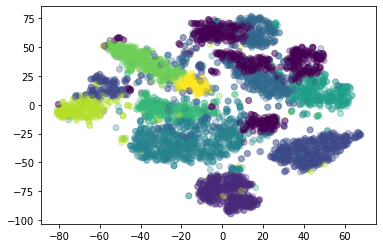

In [147]:
clusters = AgglomerativeClustering(n_clusters=10).fit(view_pca)
plt.scatter(view[:,0], view[:,1], c=clusters.labels_, alpha=0.3)
print(homogeneity_score(labels, clusters.labels_))
print(completeness_score(labels, clusters.labels_))

0.47525056862248766
0.4781870011188376


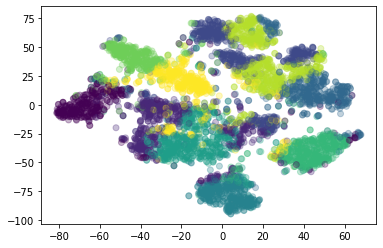

In [148]:
clusters = KMeans(n_clusters=10, random_state=0).fit(view_pca)
plt.scatter(view[:,0], view[:,1], c=clusters.labels_, alpha=0.3)
print(homogeneity_score(labels, clusters.labels_))
print(completeness_score(labels, clusters.labels_))